<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Pandas for Exploratory Data Analysis 1: Inspecting Data

_Authors: Kevin Markham (DC)_

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
# Ensures that plots appear inside the notebook.
# Not necessary in some versions of Jupyter Notebook / JupyterLab.
%matplotlib inline

In [3]:
DATA_DIR = 'C:/Users/Ashley/Desktop/General_Assembly/Lessons/exploratory_data_analysis_in_pandas-master/assets/data'

## Demo

Recall the start of our bare-bones model building process:

```python
# Load the "Pandas" library -- think of it as spreadsheets in Python
import pandas as pd

# Use pandas to load in the data
ames_df = pd.read_csv('../assets/data/ames_train.csv')

# Look at the first five rows
ames_df.head(5)

# To get us started, use just the numeric columns without missing data
ames_df = ames_df.select_dtypes(['int64', 'float64']).dropna(axis='columns')

# Split the data into the column `y` we want to predict and the 
# columns `X` we will use to make the predictions
X = ames_df.drop('SalePrice', axis='columns')
y = ames_df.loc[:, 'SalePrice']
```

All of these steps rely on the Pandas library -- Python's Swiss Army Knife for working with tabular data. In this lesson, we will learn to use Pandas to perform core data manipulation tasks such as selecting, sorting, filtering, summarizing, and joining.

## Pandas Data Types

Pandas provides two main datatypes: `DataFrame` and `Series`.

### DataFrame

- A DataFrame arranges data in rows and columns, like an Excel table.
- The `row index` contains a label for each row.
- The `column index` contains a label for each column.

When someone talks about **the** index of a DataFrame, they are generally referring to the `row index`.

In [4]:
# Example dataframe
my_df = pd.DataFrame({'a': [1, 1, 3, 4], 'b': ['x', 'y', 'y', 'z'], 'c': [5., 6., 5., 8.]})
my_df

,a,b,c
0,1,x,5.0
1,1,y,6.0
2,3,y,5.0
3,4,z,8.0


### Series

A Pandas Series is similar to a single-column DataFrame, but it does not have a column index.

In [5]:
# Pandas series
my_series = my_df.loc[:,'a']
my_series

0    1
1    1
2    3
3    4
Name: a, dtype: int64

**Note**

It is possible to have a one-column DataFrame, which does have a `column index`. Sometimes the difference matters, so pay attention to it, especially if you are getting surprising errors.

In [6]:
one_column_df = my_df.loc[:, ['a']]
one_column_df

,a
0,1
1,1
2,3
3,4


In [7]:
my_series == one_column_df

,a,0,1,2,3
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False


## Vectorization

In [8]:
new_df = my_df.copy()

# don't do this!
for row_num, row in my_df.iterrows():
    new_df.loc[row_num, 'a'] = my_df.loc[row_num, 'a'] + 1

new_df

,a,b,c
0,2,x,5.0
1,2,y,6.0
2,4,y,5.0
3,5,z,8.0


For-loops are **slow** and **ugly**! Use vector and matrix math instead (to be discussed more in a later lesson).

In [9]:
new_df = my_df.copy()

# do this instead
new_df.loc[:, 'a'] = my_df.loc[:, 'a'] + 1
new_df

,a,b,c
0,2,x,5.0
1,2,y,6.0
2,4,y,5.0
3,5,z,8.0


`pandas` automatically "broadcasts" to match dimensions when possible

**Exercise (3 mins.)**

- Multiply column "a" of `new_df` by 3 and assign the result back to column "a" of the dataframe as above.

In [10]:
new_df.loc[:, 'a'] = new_df.loc[:, 'a'] *3
new_df

,a,b,c
0,6,x,5.0
1,6,y,6.0
2,12,y,5.0
3,15,z,8.0


- Use `*` to multiply column "a" of `new_df` by column `c` of `new_df`. Simply display the result, without changing `new_df`. What math did `pandas` do to get this result?

In [11]:
new_df.loc[:, 'a'] *new_df.loc[:, 'c']

0     30.0
1     36.0
2     60.0
3    120.0
dtype: float64

$\blacksquare$

## DataFrame Methods and Attributes

- An **attribute** is a piece of information about a class instance. You use dot syntax to access it (e.g., my_df.shape).
- A **method** is a function that is defined for a specific class (e.g. Series, DataFrame). You use dot syntax to call it, with parentheses for passing in arguments.

In [12]:
# View row index
my_df.index

RangeIndex(start=0, stop=4, step=1)

In [13]:
# View column index
my_df.columns

Index(['a', 'b', 'c'], dtype='object')

In [14]:
# Select first n rows, 5 by default
my_df.head()

,a,b,c
0,1,x,5.0
1,1,y,6.0
2,3,y,5.0
3,4,z,8.0


In [15]:
# Select first 2 rows
my_df.head(2)

,a,b,c
0,1,x,5.0
1,1,y,6.0


In [16]:
# Select last 2 rows
my_df.tail(2)

,a,b,c
2,3,y,5.0
3,4,z,8.0


In [17]:
# See the types of the columns
my_df.dtypes

a      int64
b     object
c    float64
dtype: object

In [18]:
# Get a concise summary of DataFrame contents "from the computer's perspective"
my_df.shape

(4, 3)

In [19]:
# Get a concise summary of DataFrame contents from a data modeler's perspective
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
a    4 non-null int64
b    4 non-null object
c    4 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 176.0+ bytes


In [20]:
# Get summary information for non-numeric columns
my_df.describe()
my_df.describe(include='object')

,b
count,4
unique,3
top,y
freq,2


In [21]:
# Get the means of the numeric columns
my_df.mean()

a    2.25
c    6.00
dtype: float64

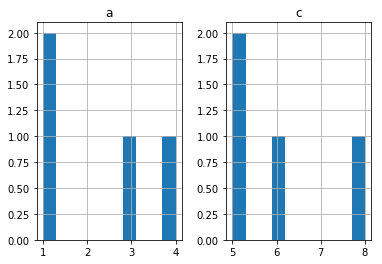

In [22]:
# Get histograms of
axes = my_df.hist() 

**Matplotlib terminology.** The plot above displays two matplotlib `Axes` objects within one matplotlib `Figure`. Confusingly, an `Axes` (not a typo) typically has an x-axis and a y-axis.

![](https://files.realpython.com/media/fig_map.bc8c7cabd823.png)

Get in the habit of inspecting the return values of plotting functions (usually one or more `Axes` objects) and assigning them to variables so that you can use their methods and attributes to customize the plot.

In [ ]:
# We defined `DATA_DIR` at the top of the notebook -- it is a string that gives
# the path to the data that we are using for this lesson. Using this variable
# rather than hard-coding each data file's full path saves keystrokes, reduces
# opportunities for error, and makes it easier to update the code if the data
# moves.
users_path = f'{DATA_DIR}/user.tbl'
users_path
df=pd.read_csv(users_path, sep = '|')

**Exercise (5 mins.)** Use the `users` DataFrame for the following exercises.

- Print the first 30 rows.

In [ ]:
df.head(30)

- Print the last 20 rows.

In [ ]:
df.tail(20)

- Use the built-in Python function `type` to get the type of `users`.

In [ ]:
df.describe()


- Get the row index.

In [ ]:
df.index

- Get the column names.

In [ ]:
df.columns

- Get the data types of the columns.

In [ ]:
df.dtypes

- Get the number of rows and columns.

In [ ]:
df.shape

- Get concise summary of contents of `users` (types, memory use, etc.)

In [ ]:
df.info()

- Get summary statistics for `users`.

In [ ]:
df.describe()

$\blacksquare$

## Selecting Rows and Columns

There are many ways to slice DataFrames.

### Recommended Approach

Use `.loc` and `.iloc`.

In [ ]:
# Select columns "a" and "b" using .loc, passing in both column names
my_df.loc[:, ['a','b']]

In [ ]:
# Select columns "a" and "b" using .loc, passing in a range of column names
my_df.loc[:,:'b']

In [ ]:
# Select columns "a" and "b" using .iloc
my_df.iloc[:, [0,1]]


**Note:** It is generally good practice to use column names (`.loc`) rather than positions (`.iloc`).

In [ ]:
# Select rows 1 and 2 using .loc
my_df.iloc[:, :2]

In [ ]:
# Select rows 1 and 2 using .iloc
my_df.loc[1:2]

In [ ]:
# Select row 1 from columns "b" and "c" using .loc. What type is the result?
my_df.iloc[1:3,:]

In [ ]:
# Select row 1 from columns "b" and "c" using .loc so that the result is a DataFrame
my_df.loc[1,['b','c']]

In [ ]:
# Select row 1 from columns "b" and "c" using .iloc
my_df.iloc[1,1:]

In [ ]:
# .loc and .iloc also work on Series, but with a Series there is only
# one dimension to select on.
my_series = my_df.loc[1,['b','c']]
print(my_series)
print(my_series.loc['b'])
print(my_series.iloc[0])

### Alternative approaches

I do not recommend using these approaches, but you should be able to recognize them.

In [ ]:
# Dictionary-style column selection
my_df['c']

In [ ]:
# Selecting multiple columns
my_df[['b', 'c']]

In [ ]:
# Slicing into a series
my_df['c'][0]

In [ ]:
# Dot syntax
my_df.c

In [ ]:
# Slicing into a series
my_df.c[1]

**Note:** There is no consensus about the "best way" to slice DataFrames, but here are some reasons that lead me to prefer `.loc` and `.iloc`:

- They are more flexible:
    - You can select a single row with `df.loc[row_label, :]` but not with slice or dot syntax.
    - You can select a list of rows with `df.loc[[row_label1, row_label2], :]` but not with slice or dot syntax.
    - You can slice columns with `df.loc[:, 'A':'C']` but not with slice or dot syntax.
    - Unlike `.` syntax, `.loc` and `.iloc` allow you to select columns that are not valid Python variable names (e.g. columns whose names start with numbers or contain spaces) or that have the same name as a variable or DataFrame method or attribute.
- They are more explicit:
    - They show clearly where you are operating on rows and where you are operating on columns. (Square brackets select columns when a string is passed and filter rows when a Boolean series is passed, which can be confusing, whereas `.loc` always operates on rows before the comma and on columns after the comma.)
    - They show clearly whether you are selecting by name or by position.
- They consistently allow you to assign values to elements of a DataFrame when selecting on both rows and columns. (See [this Stack Overflow post](https://stackoverflow.com/questions/48409128/what-is-the-difference-between-using-loc-and-using-just-square-brackets-to-filte).)

`.loc` and `.iloc` do require more keystrokes than the alternatives, but **getting confused about what your code is doing will cost you far more time than banging out a few more characters**.

There are also additional attributes such as `.ix`, `.at`, and `.iat`, but there is a consensus that you should use `.loc` and `.iloc` over those alternatives.

**Exercise (6 mins.)**

Use the `users` DataFrame for the following exercises. (This DataFrame should be loaded into memory already. Run the code above if it is not.)

- Select the "gender" column using `.loc`.

In [ ]:
#users = df
users.loc[:,'gender']

- Select rows 10-20 (inclusive) of the "gender" column using `.loc.`

In [ ]:
users.loc[10:20, :'gender']

- Select the "gender" column using `.iloc`.

In [ ]:
users.iloc[:,2]

- Select rows 10-20 (inclusive) of the "gender" column using `.iloc`.

In [ ]:
users.iloc[10:21, 2:3]

- Get the type of the object returned from the previous cell.

In [ ]:
type(users.iloc[10:21, 2:3])

- Get summary statistics for all numeric columns.

In [ ]:
users.describe()

- Get summary information about all `object` columns.

In [ ]:
users.describe(include = 'object')

- Calculate the mean of the ages.

In [ ]:
users['age'].mean()

- Create a histogram of the `ages` column.

In [ ]:
users['age'].hist()

$\blacksquare$

## Frequency Distributions

In [ ]:
users.loc[:,'gender'].value_counts()

In [ ]:
# quick plot by category
users.loc[:,'gender'].value_counts().plot(kind='bar')

In [ ]:
# Plot age histogram with plot title and axis labels
ax = users.loc[:,'age'].hist()
ax.set_xlabel('Age')
ax.set_ylabel('Number of Users')
ax.set_title('Number of users by age');

**Notes:**

- You will often see people create plots in a different way, using `matplotlib` functions calls such as `plt.title('Number of users on page')` rather than `Axes` methods such as `ax.set_title('Number of users on page')`. **In the long run, you are better off using the approach illustrated here**; see http://pbpython.com/effective-matplotlib.html and https://realpython.com/python-matplotlib-guide/.
- Recent versions of Jupyter show plots inside the notebook automatically. Older versions require running `%matplotlib inline` to activate this feature. Outside Jupyter, you typically need to run `plt.show()` to render a plot in a popup window.

In [ ]:
# Read drinks.csv into a DataFrame called 'drinks'
drinks_path = f'{DATA_DIR}/drinks.csv'
drinks = pd.read_csv(drinks_path)
drinks.head()

**Exercise (4 mins.)**

- Print the first five rows.

In [ ]:
drinks.head(5)

- Print the last five rows.

In [ ]:
drinks.tail(5)

- Print the index.

In [ ]:
drinks.index

- Print the column types.

In [ ]:
drinks.dtypes

- Print the number of rows and columns.

In [ ]:
drinks.shape

- Print the "beer_servings" column as a Series.

In [ ]:
drinks.loc[:,'beer_servings']

- Calculate the average 'beer_servings' for the entire dataset.

In [ ]:
drinks.loc[:,'beer_servings'].mean()

- Count the number of occurrences of each 'continent' value.

In [ ]:
drinks.loc[:,'continent'].value_counts()

- **BONUS:** What is wrong with the last result? How did the problem arise?

In [ ]:
drinks.head()

$\blacksquare$

## Filtering

We can use simple operator comparisons on columns to extract relevant or drop irrelevant information.

### Filtering on a Single Condition

In [ ]:
# create a Series of booleans...
# in Pandas, this comparison is performed element-wise on each row of data
young_bool=users.loc[:,'age']<20
young_bool

In [ ]:
# ...and use that Series to filter rows
users.loc[young_bool,:]
users.loc[young_bool=users.loc[:,'age']<20,:]

In [ ]:
# or, combine into a single step -- which one is easier to read?
users.loc[users.loc[:'age']<20,:]


In [ ]:
# select "occupation" column from the filtered results
users.loc[young_bool,'occupation'].value_counts()

In [ ]:
# value_counts of resulting Series


### Filtering on Multiple Conditions

In [ ]:
# ampersand for AND condition. (this is a "bitwise" AND)
# important: you MUST put parentheses around each expression because '&' has a higher precedence than '<'!
users.loc[(users.loc[:,'age']<20) & (users.loc[:,'gender']=='M'),:]

In [ ]:
# pipe for OR condition. (this is a "bitwise" OR)
# important: you MUST put parentheses around each expression because '|' has a higher precedence than '<'!
users.loc[(users.loc[:,'age']<20) | (users.loc[:,'age']>60),:]

In [ ]:
# preferred alternative to multiple OR conditions
users.loc[users.loc[:, 'occupation'].isin(['lawyer', 'doctor', 'executive']), :]

In [ ]:
# tilde for NOT condition. (this is a "bitwise" NOT)
users.loc[~users.loc[:,'age'] < 20,:]

**Exercise (3 mins.)**

- Filter the DataFrame to include only European countries.

In [ ]:
drinks.head()
drinks.loc[drinks.loc[:,'continent'] == 'EU',:]


- Filter the DataFrame to include only European countries with more than 300 `wine_servings`.

In [ ]:
drinks.loc[(drinks.loc[:,'continent'] == 'EU')&(drinks.loc[:,'wine_servings'] > 300)]

- Calculate the average 'beer_servings' for all of Europe.

In [ ]:
drinks.loc[drinks.loc[:,'continent'] == 'EU',:].loc[:,'beer_servings'].mean()

$\blacksquare$